In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [38]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

fontsize = 35
ticksize = 15
mpl.rcParams.update({'font.size': fontsize})

In [39]:
dm_sim = np.loadtxt("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000.ascii")

In [40]:
dm_sim.shape

(4096000, 7)

In [41]:
thickness = 60

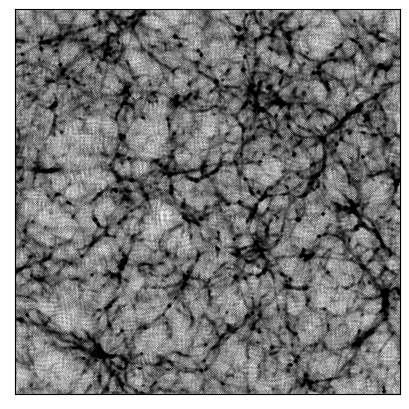

In [42]:
plt.figure(figsize=(5, 5), dpi=100)
plt.gca().set_aspect('equal')
plt.scatter(dm_sim[dm_sim[:,2]*0.6774<thickness,0]*0.6774, dm_sim[dm_sim[:,2]*0.6774<thickness,1]*0.6774,s=0.0005,c="k")
plt.ylim(0,250)
plt.xlim(0,250)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [43]:
halos = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000.npy")
print(halos.shape)

(1758, 6)


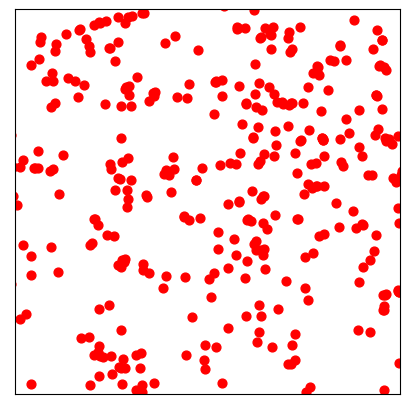

In [127]:
plt.figure(figsize=(5, 5), dpi=100)
plt.gca().set_aspect('equal')
plt.scatter(halos[halos[:,5]*0.6774<thickness,3]*0.6774, halos[halos[:,5]*0.6774<thickness,4]*0.6774,s=40,c="red")
plt.ylim(0,250)
plt.xlim(0,250)
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [45]:
pd = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000_5.npy")
print(pd.shape)

(451, 3)


In [46]:
pd0 = pd[pd[:,0]==0]
pd1 = pd[pd[:,0]==1]
pd2 = pd[pd[:,0]==2]

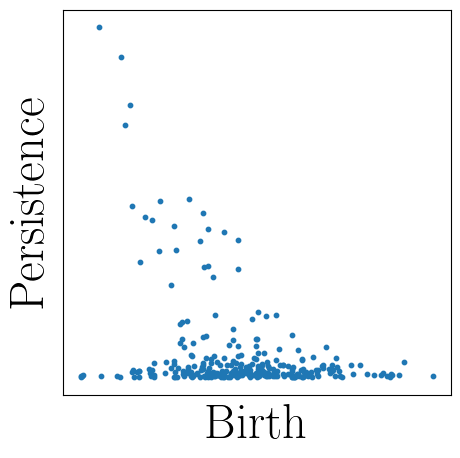

In [105]:
plt.figure(figsize=(5, 5), dpi=100)
# plt.gca().set_aspect('equal')
plt.scatter(pd0[:,1], pd0[:,2]-pd0[:,1],s=10)
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

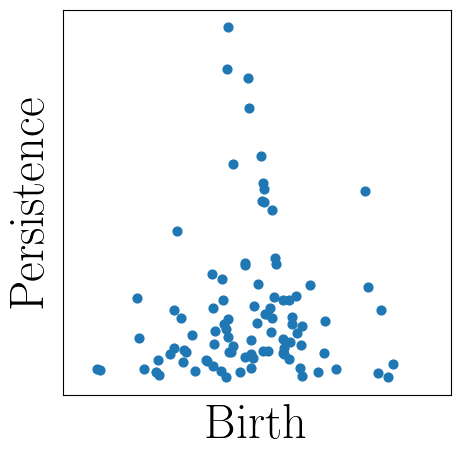

In [126]:
plt.figure(figsize=(5, 5), dpi=100)
# plt.gca().set_aspect('equal')
plt.scatter(pd1[:,1], pd1[:,2]-pd1[:,1],s=40)
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.xticks([], [])
plt.xlim(18,60)
plt.yticks([], [])
plt.show()

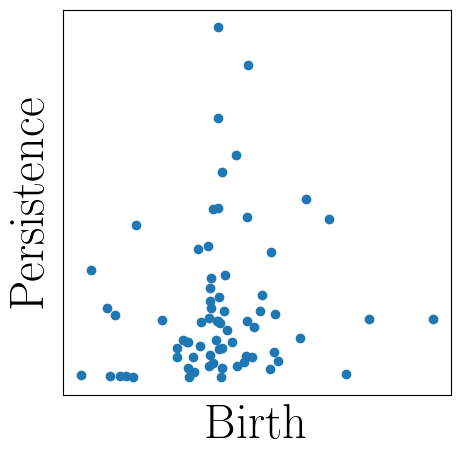

In [49]:
plt.figure(figsize=(5, 5), dpi=100)
# plt.gca().set_aspect('equal')
plt.scatter(pd2[:,1], pd2[:,2]-pd2[:,1])
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [50]:
PI0 = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000_5_0_64_2.0.npy")
PI1 = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000_5_1_64_2.0.npy")
PI2 = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000_5_2_64_2.0.npy")

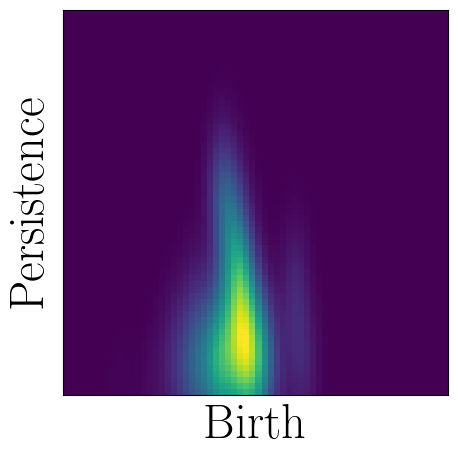

In [121]:
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(PI1, origin="lower")
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [54]:
hist = np.load("fs_0.3089_0.8159_0.1_0.5_10_256_160_1_fid_5000_5_64.npy")
hist.shape

(576,)

In [68]:
def res_changer(vec_high_res, res_len_low):
    sum_width = int(vec_high_res.shape[0]/res_len_low)
    print(sum_width)
    vec_low_res = np.zeros(res_len_low)
    for j in range(res_len_low):
        vec_low_res[j] = np.sum(vec_high_res[j*sum_width:(j+1)*sum_width])
    
    return vec_low_res

In [69]:
ind = np.concatenate((np.arange(0,64*3),np.arange(64*3,64*6)))
hist_BP = hist[ind]
hist_BP = res_changer(hist_BP, 96)
hist_BP.shape

4


(96,)

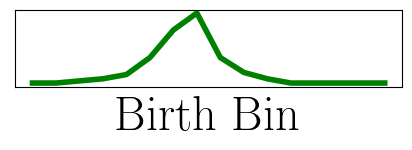

In [123]:
plt.figure(figsize=(5, 1), dpi=100)
plt.xlabel("Birth Bin")
# plt.ylabel("Count")
plt.xticks([], [])
plt.yticks([], [])
plt.plot(range(16), hist_BP[16:16+16],lw=4,color="g")
plt.show()

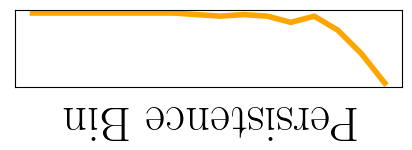

In [124]:
plt.figure(figsize=(5, 1), dpi=100)
# plt.xlabel("Persistence Bin")
# plt.ylabel("Count")
plt.xticks([], [])
plt.yticks([], [])
# plt.ylim(-1,)
plt.plot(range(16), np.flip(hist_BP[48+16:48+32]),lw=4,color="orange")
plt.gca().set_xlabel('Persistence Bin', rotation='180')
plt.gca().invert_yaxis()
plt.show()